In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Make plots show inline in the notebook
%matplotlib inline

DATA_RAW = "../data_pipeline/data/raw"
DATA_PROC = "../data_pipeline/data/processed"

In [4]:
prices_path = os.path.join(DATA_RAW, "prices.csv")
features_path = os.path.join(DATA_PROC, "features_basic.csv")
returns_path = os.path.join(DATA_PROC, "daily_returns.csv")

prices = pd.read_csv(prices_path, index_col="date", parse_dates=True)
features = pd.read_csv(features_path, index_col="date", parse_dates=True)
returns = pd.read_csv(returns_path, index_col="date", parse_dates=True)

print("Prices shape:", prices.shape)
print("Features shape:", features.shape)
print("Returns shape:", returns.shape)

prices.head().T.iloc[:5]

Prices shape: (1978, 60)
Features shape: (1948, 180)
Returns shape: (1977, 60)


date,2018-01-02,2018-01-03,2018-01-04,2018-01-05,2018-01-08
AAPL,40.341888,40.334862,40.522209,40.983582,40.831348
ABBV,69.901642,70.995506,70.590622,71.819466,70.668755
ACN,136.707809,137.338745,138.964966,140.111282,141.231003
ADBE,177.699997,181.039993,183.220001,185.339996,185.039993
AMAT,48.529533,49.389587,49.673233,49.956867,51.164619


In [5]:
ticker = "AAPL"

# Raw price series for this ticker
aapl_price = prices[ticker]

# Factor columns related to this ticker
cols = [c for c in features.columns if c.startswith(ticker + "_")]
cols

['AAPL_mom30', 'AAPL_mom90', 'AAPL_vol30']

In [6]:
aapl_factors = features[cols].copy()
aapl_factors.head()


,AAPL_mom30,AAPL_mom90,AAPL_vol30
date,,,
2018-02-14,-0.024426,NaN,0.018014
2018-02-15,0.008508,NaN,0.019069
2018-02-16,0.000595,NaN,0.019064
2018-02-20,-0.013996,NaN,0.018955
2018-02-21,-0.014812,NaN,0.018961


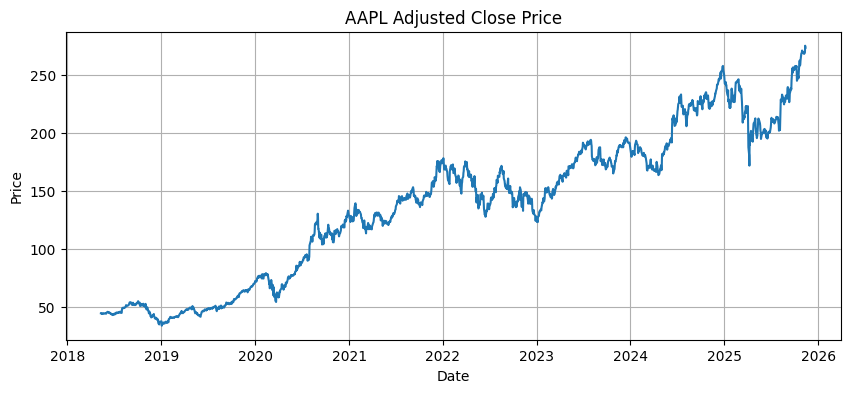

In [8]:
aapl_df = pd.concat(
    [aapl_price.rename("price"), aapl_factors],
    axis=1
).dropna()

aapl_df.head()

plt.figure(figsize=(10, 4))
plt.plot(aapl_df.index, aapl_df["price"])
plt.title("AAPL Adjusted Close Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid(True)
plt.show()

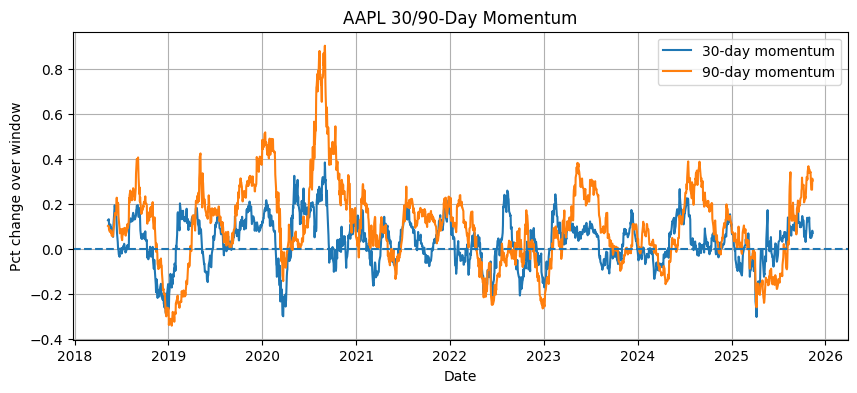

In [9]:
plt.figure(figsize=(10, 4))
plt.plot(aapl_df.index, aapl_df[f"{ticker}_mom30"], label="30-day momentum")
plt.plot(aapl_df.index, aapl_df[f"{ticker}_mom90"], label="90-day momentum")
plt.axhline(0, linestyle="--")
plt.title("AAPL 30/90-Day Momentum")
plt.xlabel("Date")
plt.ylabel("Pct change over window")
plt.legend()
plt.grid(True)
plt.show()

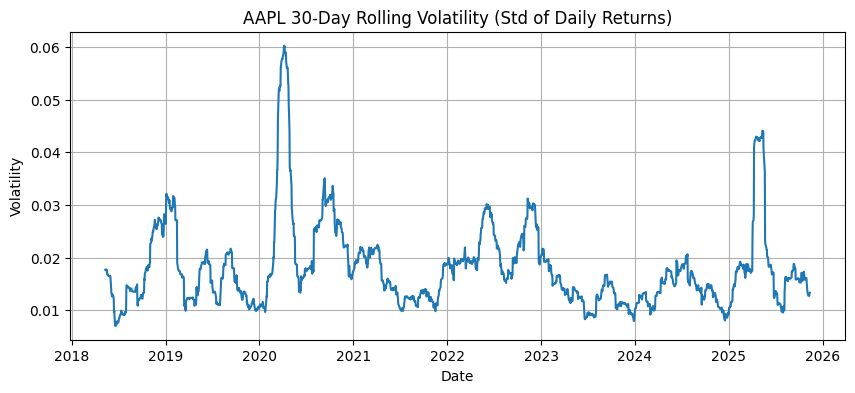

In [10]:
plt.figure(figsize=(10, 4))
plt.plot(aapl_df.index, aapl_df[f"{ticker}_vol30"])
plt.title("AAPL 30-Day Rolling Volatility (Std of Daily Returns)")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.grid(True)
plt.show()